In [1]:
import numpy
import tqdm
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import wendy
import matplotlib.animation as animation
from matplotlib import cm
%pylab inline
from IPython.display import HTML
_SAVE_GIFS= True
rcParams.update({'axes.labelsize': 17.,
              'font.size': 12.,
              'legend.fontsize': 17.,
              'xtick.labelsize':15.,
              'ytick.labelsize':15.,
              'text.usetex': _SAVE_GIFS,
              'figure.figsize': [5,5],
              'xtick.major.size' : 4,
              'ytick.major.size' : 4,
              'xtick.minor.size' : 2,
              'ytick.minor.size' : 2,
              'legend.numpoints':1})
import copy
numpy.random.seed(2)

Populating the interactive namespace from numpy and matplotlib


In [50]:
N= 300000
nt= 2000
v0= -5.
pmdisk=1.

totmass= 1. # Sigma above
sigma= 1.
zh= sigma**2./totmass # twopiG = 1. in our units
tdyn= zh/sigma
dt = 0.02*tdyn
z= numpy.arctanh(2.*numpy.random.uniform(size=N)-1)*zh*2.
v= numpy.random.normal(size=N)*sigma
v-= numpy.mean(v) # stabilize

msat = pmdisk*totmass
z0 = max(z)*2.
i_remove = int(round((min(z)-0.1-z0)/v0/dt))

m= totmass*numpy.ones_like(z)/(N-1)

z[-1] = z0
v[-1] = v0
m[-1] = msat

print(i_remove)
print(msat)

378
1.0


In [51]:
g= wendy.nbody(z,v,m,dt,approx=True,nleap=5)

In [52]:
zt= numpy.empty((N,nt+1))
vt= numpy.empty((N,nt+1))
Et= numpy.empty((nt+1))
zt[:,0]= z
vt[:,0]= v
Et[0]= wendy.energy(z,v,m)
    
for ii in tqdm.trange(i_remove):
    tz,tv= next(g)
    tz[-1]= z0+ii*dt*v0
    tv[-1]= v0
    zt[:,ii+1]= tz
    vt[:,ii+1]= tv
    Et[ii+1]= wendy.energy(tz,tv,m)
    g = wendy.nbody(tz,tv,m,dt,approx=True,nleap=1)
    
g= wendy.nbody(tz[:-1],tv[:-1],m[:-1],dt,approx=True,nleap=5)
for ii in tqdm.trange(nt-i_remove):
    tz,tv= next(g)
    zt[:-1,ii+i_remove+1]= tz
    vt[:-1,ii+i_remove+1]= tv
    Et[ii+i_remove+1]= wendy.energy(tz,tv,m[:-1],twopiG=2.*pi)
    
z_start= zt[:,-1]
v_start= vt[:,-1]

100%|██████████| 1622/1622 [06:07<00:00,  4.42it/s]


In [53]:
zt_iso1 = array([zt[:,i]-median(zt[:,i]) for i in range(i_remove)])
zt_iso2 = array([zt[:-1,i+i_remove]-median(zt[:-1,i+i_remove]) for i in range(nt-i_remove+1)])

zt_iso = zeros([N,nt+1])
zt_iso[:,:i_remove] = zt_iso1.T
zt_iso[:-1,i_remove:] = zt_iso2.T
zt_iso[-1,i_remove:] = nan

[0, 335, 500, 1000, 1500, 2000]


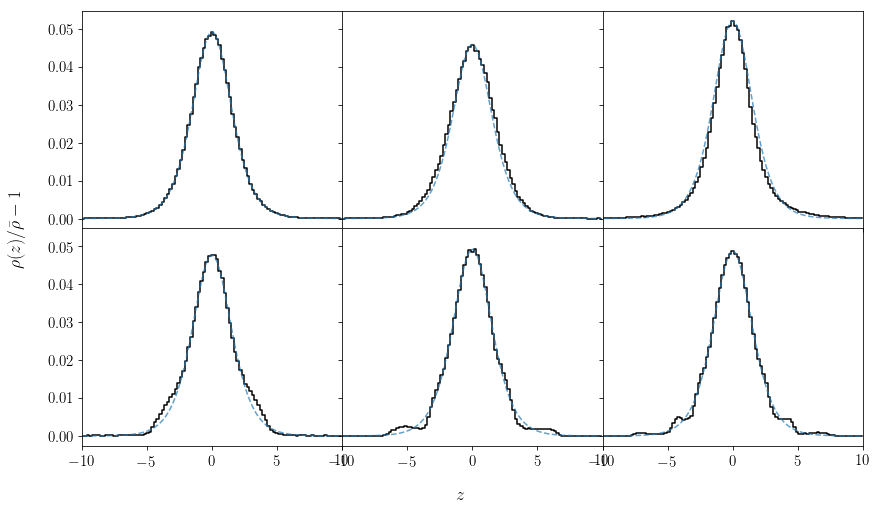

In [54]:
times= arange(start=0.,stop=(nt+1)*dt,step=dt)
index = [0,335,500,1000,1500,2000]
mrho= 0
r=[-10,10]

print(index)
figsize(14,8)
f, ax = plt.subplots(2,3, sharex=True, sharey=True)
f.subplots_adjust(hspace=0,wspace=0)

ax = ax.ravel()

f.text(0.5, 0.04, r'$z$', ha='center', va='center',size=18.)
f.text(0.06, 0.5, r'$\rho(z)/\bar{\rho}-1$', ha='center', va='center', rotation='vertical',size=18.)

for i,axis in enumerate(ax):
    hist,edge = histogram(zt_iso[:-1,index[i]],range=r,bins=101,weights=m[:-1])
    mid= np.diff(edge)/2.+edge[:-1]
    mrho= np.max(hist)/numpy.cosh(mid/2./zh)**2.
    
    axis.axvline(zt_iso[-1,index[i]])
    axis.set_xlim(r)
    axis.step(mid,hist,where='mid',color='k')
    axis.plot(mid,mrho,'--',color='C0',alpha=0.7)
    #axis.annotate(r'$t=%.0f\textup{ Myr}$' % (times[i]*19),
     #              (0.95,0.95),xycoords='axes fraction',
      #              horizontalalignment='right',verticalalignment='top',size=18.)

[0, 335, 500, 1000, 1500, 2000]


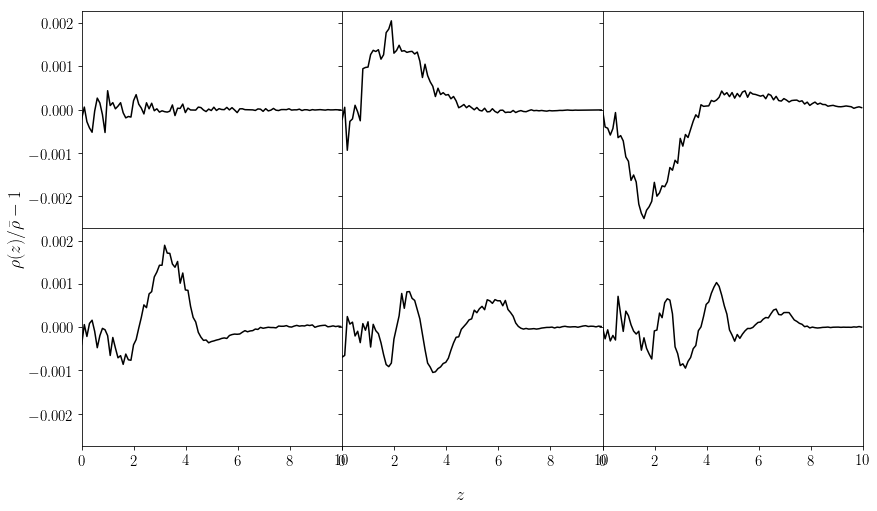

In [55]:
times= arange(start=0.,stop=(nt+1)*dt,step=dt)
index = [0,335,500,1000,1500,2000]
mrho= 0
r=[-10,10]
nbins=201

print(index)
figsize(14,8)
f, ax = plt.subplots(2,3, sharex=True, sharey=True)
f.subplots_adjust(hspace=0,wspace=0)

ax = ax.ravel()
f.text(0.5, 0.04, r'$z$', ha='center', va='center',size=18.)
f.text(0.06, 0.5, r'$\rho(z)/\bar{\rho}-1$', ha='center', va='center', rotation='vertical',size=18.)

for i,axis in enumerate(ax):
    hist,edge = histogram(zt_iso[:-1,index[i]],range=r,bins=nbins,weights=m[:-1])
    mid= np.diff(edge)/2.+edge[:-1]
    mrho= np.max(hist)/numpy.cosh(mid/2./zh)**2.
    
    axis.axvline(zt_iso[-1,index[i]])
    axis.axhline
    axis.set_xlim([0,r[1]])
    axis.plot(mid,hist-mrho,color='k')
    #axis.annotate(r'$t=%.0f\textup{ Myr}$' % (times[i]*19),
        #           (0.95,0.95),xycoords='axes fraction',
        #            horizontalalignment='right',verticalalignment='top',size=18.)

[0, 335, 500, 1000, 1500, 2000]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


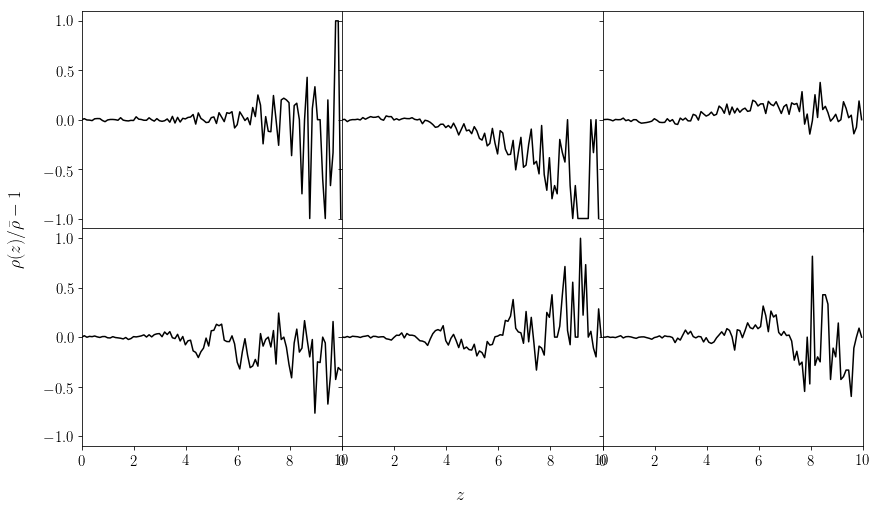

In [56]:
times= arange(start=0.,stop=(nt+1)*dt,step=dt)
index = [0,335,500,1000,1500,2000]
mrho= 0
r=[-10,10]
nbins=201

print(index)
figsize(14,8)
f, ax = plt.subplots(2,3, sharex=True, sharey=True)
f.subplots_adjust(hspace=0,wspace=0)

ax = ax.ravel()
f.text(0.5, 0.04, r'$z$', ha='center', va='center',size=18.)
f.text(0.06, 0.5, r'$\rho(z)/\bar{\rho}-1$', ha='center', va='center', rotation='vertical',size=18.)

for i,axis in enumerate(ax):
    hist,edge = histogram(zt_iso[:-1,index[i]],range=r,bins=nbins,weights=m[:-1])
    mid= np.diff(edge)/2.+edge[:-1]
    mrho= np.max(hist)/numpy.cosh(mid/2./zh)**2.
    
    axis.axvline(zt_iso[-1,index[i]])
    axis.axhline
    axis.set_xlim([0,r[1]])
    axis.plot(mid[int((nbins-1)/2):],((hist-hist[::-1])/(hist+hist[::-1]))[int((nbins-1)/2):],color='k')